# Data Collection

For this project, we aim to build a **predictive model** that could **classify forest cover type** based on **cartographic variables**. Understanding the relationships among these variables could be valuable for **land management** and **ecological studies**.

## 1. Data Source and Subject

- **Subject**: The dataset contains information about different forest cover types, which is Spruce/Fir, Lodgepole Pine, Aspen, and so on, in four wilderness areas located in Roosevelt National Forest of Nothern Colorado. Each observation represents a $30*30$ meters cell and includes various cartographic variables such as elevation, slope, aspect, distance to hydrology, and soil type.
- **Source**: We are using the "Covertype" dataset available from UCI Machine Learning Repository: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset/.

## 2. Data License

The dataset is made available under the Public Domain. There are no restrictions on its use, modification, or distribution.

## 3. Data Collection Method

- **Method**: The data was originally collected by the US Forest Service (USFS) Region 2 Resource Information System (RIS). The observations were derived from data obtained from the US Geological Survey (USGS) and the USFS.
  - **Catographic Variables**: Cartographic variables were determined using USGS Digital Elevation Model (DEMs) and other geographic information system (GIS) data.
  - **Soil Type**: Soil type designations were based on USFS Ecological Landtype Units (ELUs).
  - **Wilderness Area**: The actual forest cover type for each 30 x 30-meter cell was determined using observations and aerial photography.

## 4. Data Ethics and Limitations

- **Data Collection Date**: The dataset was donated on 7/31/1998. Forest cover type could change overtime due to natural disturbances and human activities. Therefore, the data may not perfectly reflect current forest conditions in Roosevelt National Forest.
- **Spatial**: The $30*30$ meters solution may not capture fine-scale variations in forest cover type within each cell.
- **Data Accuracy**: While the data has been widely used, it's important to note that the accuracy of the original USFS and USGS data sources can influence the reliability of the dataset.
- **Limited Scope:** This dataset is specific to a limited region in Colorado, so our findings might not be directly transferable to other forests.

# Data Exploratory Analysis (EDA)

## 1. Import Libraries

In [84]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Basic Description

In [86]:
df = pd.read_csv('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [87]:
rows, cols = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')

Number of rows: 581012
Number of columns: 55


As you could see that there are 581012 rows, and 55 columns. 

Each row represents a $30*30$ cell of a forest land within the **Roosevelt National Forest of northern Colorado**.

The columns represent the following cartographic and ecological variables:

*   **Elevation:** Elevation in meters.
*   **Aspect:** Aspect in degrees azimuth.
*   **Slope:** Slope in degrees.
*   **Horizontal\_Distance\_To\_Hydrology:** Horizontal distance to the nearest surface water feature (in meters).
*   **Vertical\_Distance\_To\_Hydrology:** Vertical distance to the nearest surface water feature (in meters).
*   **Horizontal\_Distance\_To\_Roadways:** Horizontal distance to the nearest roadway (in meters).
*   **Hillshade\_9am:** Hillshade index at 9 am on the summer solstice (0 to 255 index).
*   **Hillshade\_Noon:** Hillshade index at noon on the summer solstice (0 to 255 index).
*   **Hillshade\_3pm:** Hillshade index at 3 pm on the summer solstice (0 to 255 index).
*   **Horizontal\_Distance\_To\_Fire\_Points:** Horizontal distance to the nearest wildfire ignition point (in meters).
*   **Wilderness\_Area\_1 to Wilderness\_Area\_4:** One-hot encoded columns representing the wilderness area:
    *   1: Rawah Wilderness Area
    *   2: Neota Wilderness Area
    *   3: Comanche Peak Wilderness Area
    *   4: Cache la Poudre Wilderness Area
*   **Soil\_Type\_1 to Soil\_Type\_40:** One-hot encoded columns representing 40 different soil types (ELUs).
*   **Cover\_Type:** The forest cover type (integer class label 1-7), which is the target variable:
    *   1: Spruce/Fir
    *   2: Lodgepole Pine
    *   3: Ponderosa Pine
    *   4: Cottonwood/Willow
    *   5: Aspen
    *   6: Douglas-fir
    *   7: Krummholz

## 3. Data Quality Checks

In [90]:
duplicate_rows = df.duplicated().sum()
print(f'Number of duplicated rows: {duplicate_rows}')

Number of duplicated rows: 0


So there are no duplicated rows in the dataset.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

**Observation:** The data types appear appropriate. Numerical features are `int64`, and the one-hot encoded categorical features are `int64` (which is suitable for binary 0/1 representation).

## 4. Numerical Data Analysis

Let's analyze each numerical column: `Elevation`, `Aspect`, `Slope`, `Horizontal_Distance_To_Hydrology`, `Vertical_Distance_To_Hydrology`, `Horizontal_Distance_To_Roadways`, `Hillshade_9am`, `Hillshade_Noon`, `Hillshade_3pm`, `Horizontal_Distance_To_Fire_Points`.

1. `Elevation`
- Represents the height above sea level (in meters).
- Expected range: Depends on the location of the forest; typically between 0 and 8848 (highest elevation on Earth).
- Potential abnormalities:
    - Extremely low values (e.g., negative or close to zero, as forests aren’t in deep depressions).
    - Extremely high values (e.g., > 9000 meters, unlikely for forested areas).
  
2. `Aspect`
- Represents the compass direction of the slope (0 to 360 degrees).
- Expected range: 0–360 (where 0 = North, 90 = East, etc.).
- Potential abnormalities:
    - Values outside 0–360.
    - Missing or default values (e.g., if coded as -1 or 999).
      
3. `Slope`
- Represents the steepness of the slope in degrees.
- Expected range: 0–90 degrees (0 = flat, 90 = vertical).
- Potential abnormalities:
    - Values greater than 90 or less than 0.
    - Extremely high slopes (close to 90) could indicate rare or misreported areas.
      
4. `Horizontal_Distance_To_Hydrology`
- Horizontal distance to the nearest water body (in meters).
- Expected range: Depends on the forest’s geography but typically positive values (as distances cannot be negative).
- Potential abnormalities:
    - Negative values (not possible for distance).
    - Extremely large distances (e.g., thousands of kilometers, which might indicate erroneous or unscaled data).
      
5. `Vertical_Distance_To_Hydrology`
- Vertical distance to the nearest water body (in meters).
- Expected range: Positive or negative values (positive = above water level; negative = below water level).
- Potential abnormalities:
    - Extremely large positive or negative values (e.g., > ±500 meters, as water bodies are usually close to ground level).
      
6. `Horizontal_Distance_To_Roadways`
- Horizontal distance to the nearest road (in meters).
- Expected range: Positive values (distance cannot be negative).
- Potential abnormalities:
    - Negative values.
    - Extremely large distances (e.g., >100 km in highly connected areas might be questionable).
      
7. `Hillshade_9am, Hillshade_Noon, Hillshade_3pm`
- Indicate the amount of sunlight (0–255) at specific times of day.
- Expected range: 0–255 (0 = no sunlight, 255 = maximum sunlight).
- Potential abnormalities:
    - Values outside 0–255.
    - Simultaneously high values for all three times (unlikely due to natural shading and light direction).
    - Simultaneously low values for all three times (e.g., 0, 0, 0, which might indicate data recording errors).
      
8. `Horizontal_Distance_To_Fire_Points`
- Horizontal distance to the nearest fire point (in meters).
- Expected range: Positive values (distance cannot be negative).
- Potential abnormalities:
    - Negative values.
    - Extremely large distances (e.g., thousands of kilometers might indicate data errors or poor scaling).

Analysis of columns: Elevation


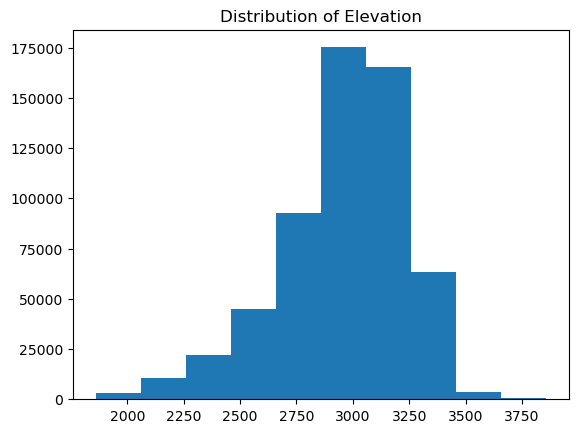

Percentage of missing values: 0.00%
Min value: 1859
Max value: 3858
Number of abnormal values: 0
Abnormal values:  Series([], Name: Elevation, dtype: int64)


Analysis of columns: Aspect


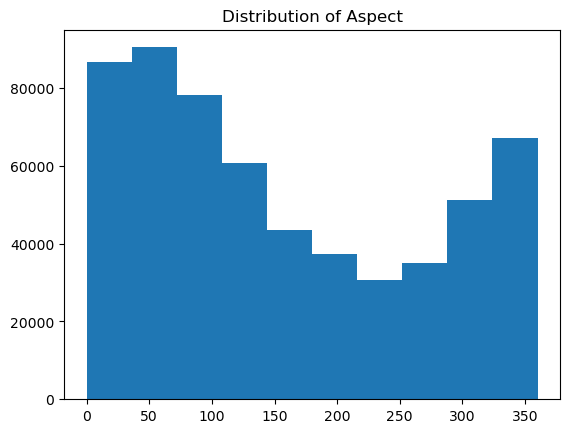

Percentage of missing values: 0.00%
Min value: 0
Max value: 360
Number of abnormal values: 0
Abnormal values:  Series([], Name: Aspect, dtype: int64)


Analysis of columns: Slope


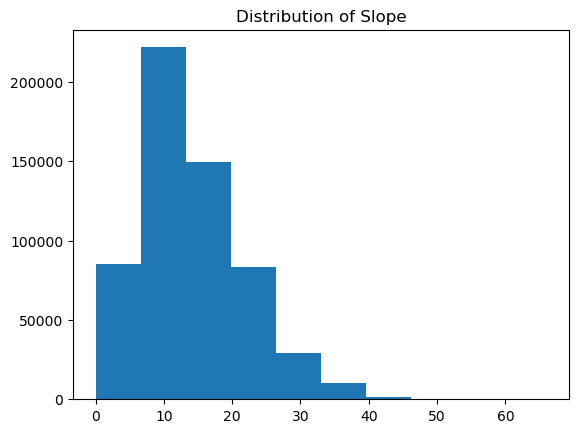

Percentage of missing values: 0.00%
Min value: 0
Max value: 66
Number of abnormal values: 0
Abnormal values:  Series([], Name: Slope, dtype: int64)


Analysis of columns: Horizontal_Distance_To_Hydrology


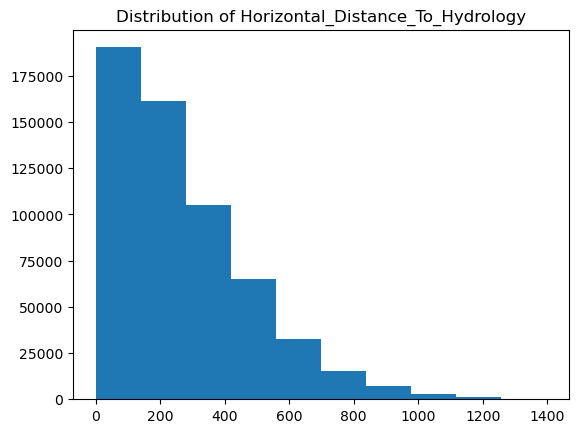

Percentage of missing values: 0.00%
Min value: 0
Max value: 1397
Number of abnormal values: 0
Abnormal values:  Series([], Name: Horizontal_Distance_To_Hydrology, dtype: int64)


Analysis of columns: Vertical_Distance_To_Hydrology


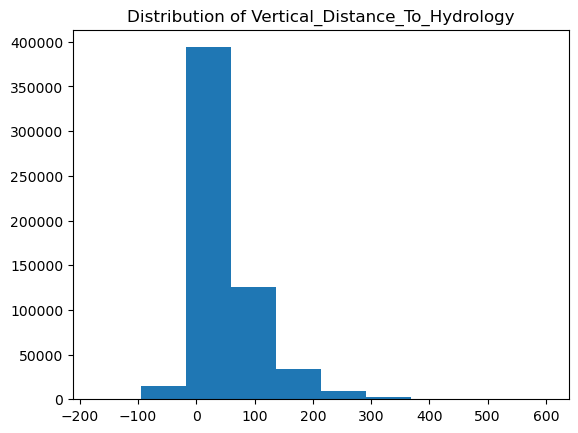

Percentage of missing values: 0.00%
Min value: -173
Max value: 601
Number of abnormal values: 113
Abnormal values:  1803      554
1892      547
11938     547
218208    530
218209    550
         ... 
225518    595
225982    504
225983    527
225984    544
225985    564
Name: Vertical_Distance_To_Hydrology, Length: 113, dtype: int64


Analysis of columns: Horizontal_Distance_To_Roadways


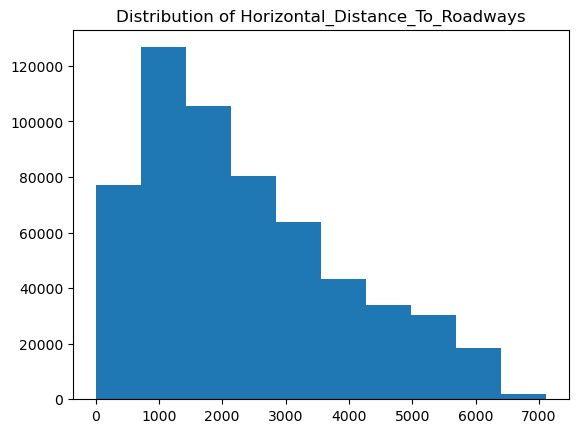

Percentage of missing values: 0.00%
Min value: 0
Max value: 7117
Number of abnormal values: 0
Abnormal values:  Series([], Name: Horizontal_Distance_To_Roadways, dtype: int64)


Analysis of columns: Hillshade_9am


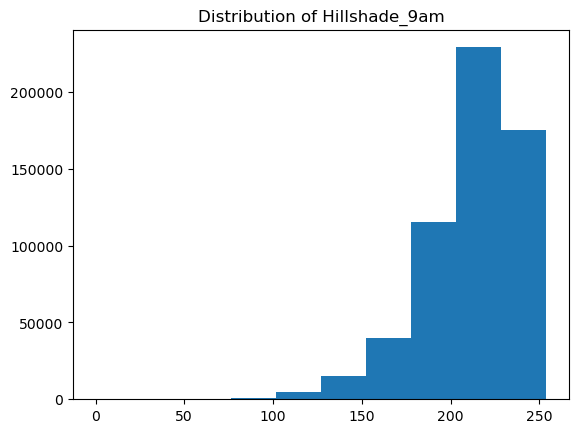

Percentage of missing values: 0.00%
Min value: 0
Max value: 254
Number of abnormal values: 0
Abnormal values:  Series([], Name: Hillshade_9am, dtype: int64)


Analysis of columns: Hillshade_Noon


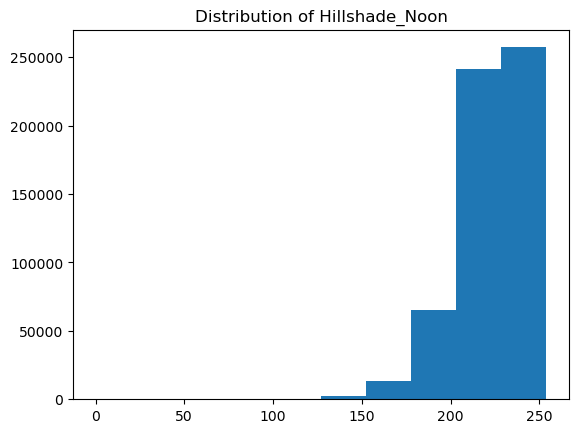

Percentage of missing values: 0.00%
Min value: 0
Max value: 254
Number of abnormal values: 0
Abnormal values:  Series([], Name: Hillshade_Noon, dtype: int64)


Analysis of columns: Hillshade_3pm


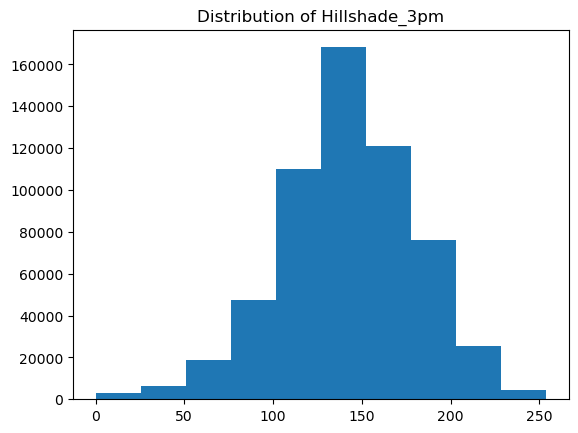

Percentage of missing values: 0.00%
Min value: 0
Max value: 254
Number of abnormal values: 0
Abnormal values:  Series([], Name: Hillshade_3pm, dtype: int64)


Analysis of columns: Horizontal_Distance_To_Fire_Points


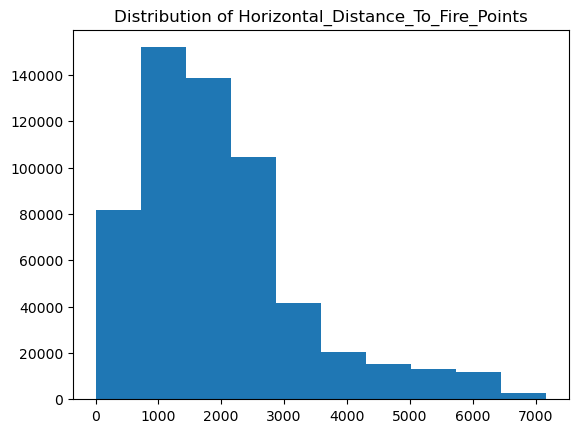

Percentage of missing values: 0.00%
Min value: 0
Max value: 7173
Number of abnormal values: 0
Abnormal values:  Series([], Name: Horizontal_Distance_To_Fire_Points, dtype: int64)




In [96]:
numerical_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                  'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                  'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                  'Horizontal_Distance_To_Fire_Points']

def identify_abnormal_values(df):
    abnormal_values = {}

    # 1. Elevation: Check for negative or too high values
    abnormal_values['Elevation'] = df[(df['Elevation'] < 0) | (df['Elevation'] > 8848)]['Elevation']

    # 2. Aspect: Check for values outside 0-360
    abnormal_values['Aspect'] = df[(df['Aspect'] < 0) | (df['Aspect'] > 360)]['Aspect']

    # 3. Slope: Check for values outside 0-90
    abnormal_values['Slope'] = df[(df['Slope'] < 0) | (df['Slope'] > 90)]['Slope']

    # 4. Horizontal_Distance_To_Hydrology: Check for negative values or extreme distances
    abnormal_values['Horizontal_Distance_To_Hydrology'] = df[(df['Horizontal_Distance_To_Hydrology'] < 0) | (df['Horizontal_Distance_To_Hydrology'] > 100000)]['Horizontal_Distance_To_Hydrology']

    # 5. Vertical_Distance_To_Hydrology: Check for extreme values
    abnormal_values['Vertical_Distance_To_Hydrology'] = df[(df['Vertical_Distance_To_Hydrology'] < -500) | (df['Vertical_Distance_To_Hydrology'] > 500)]['Vertical_Distance_To_Hydrology']

    # 6. Horizontal_Distance_To_Roadways: Check for negative values or extreme distances
    abnormal_values['Horizontal_Distance_To_Roadways'] = df[(df['Horizontal_Distance_To_Roadways'] < 0) | (df['Horizontal_Distance_To_Roadways'] > 100000)]['Horizontal_Distance_To_Roadways']

    # 7. Hillshade_9am, Hillshade_Noon, Hillshade_3pm: Check for values outside 0-255
    abnormal_values['Hillshade_9am'] = df[(df['Hillshade_9am'] < 0) | (df['Hillshade_9am'] > 255)]['Hillshade_9am']
    abnormal_values['Hillshade_Noon'] = df[(df['Hillshade_Noon'] < 0) | (df['Hillshade_Noon'] > 255)]['Hillshade_Noon']
    abnormal_values['Hillshade_3pm'] = df[(df['Hillshade_3pm'] < 0) | (df['Hillshade_3pm'] > 255)]['Hillshade_3pm']

    # 8. Horizontal_Distance_To_Fire_Points: Check for negative values or extreme distances
    abnormal_values['Horizontal_Distance_To_Fire_Points'] = df[(df['Horizontal_Distance_To_Fire_Points'] < 0) | (df['Horizontal_Distance_To_Fire_Points'] > 100000)]['Horizontal_Distance_To_Fire_Points']

    # Return abnormal values for each feature
    return abnormal_values

abnormal_values = identify_abnormal_values(df)

for col in numerical_cols:
    print(f'Analysis of columns: {col}')

    plt.hist(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

    missing_percentage = df[col].isnull().sum() * 100.0 / rows
    print(f'Percentage of missing values: {missing_percentage:.2f}%')

    min_val = df[col].min()
    max_val = df[col].max()

    print(f'Min value: {min_val}')
    print(f'Max value: {max_val}')

    print(f'Number of abnormal values: {len(abnormal_values[col])}')
    print('Abnormal values: ', abnormal_values[col])

    print('\n')
    

As we could see, there are 113 abnormal values of the column `Vertical_Distance_To_Hydrology`, which is the value 500 meters above the water, **Water bodies** can indeed be found at elevations above 500 meters, especially in mountainous or highland regions.

According to the location (Roosevelt National Forest), we have some further informations:
- **Location:** Roosevelt National Forest is located in the Rocky Mountains of northern Colorado, which are highly mountainous areas.
- **Elevation:** The elevation of this forest varies widely due to the mountainous terrain. Some areas in the forest have elevations ranging from about 1,500 meters (5,000 feet) to over 4,000 meters (13,000 feet).
- **Water Bodies:** There are numerous rivers, streams, and lakes throughout the forest, and some of them are indeed located at high elevations.

**Conclusion:** It is kinda normal to have 113 values > 500 meters.

## 5. Categorical Data Analysis

Categorical columns include from `Wilderness_Area_1` -> `Wilderness_Area_40`, and from `Soil_Type_1` -> `Soil_Type_40`, and `Cover_Type`. However, we will treat `Wilderness_Area` and `Soil_Type` as one column each, for easier analysis.

In [100]:
wilderness_cols = [col for col in df.columns if 'Wilderness_Area' in col]
df['Wilderness_Area'] = df[wilderness_cols].idxmax(axis=1).str.replace('Wilderness_Area', '')

soil_type_cols = [col for col in df.columns if 'Soil_Type' in col]
df['Soil_Type'] = df[soil_type_cols].idxmax(axis=1).str.replace('Soil_Type', '')

Analysis of column: Wilderness_Area


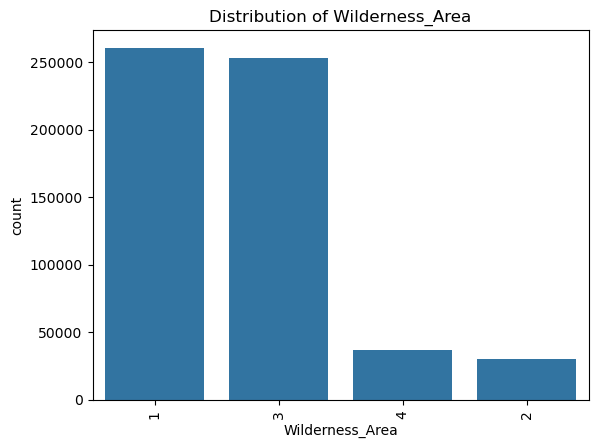

Percentage of missing values: 0.00%
Number of unique values: 4
Example of unique values:  ['1' '3' '4' '2']


Analysis of column: Soil_Type


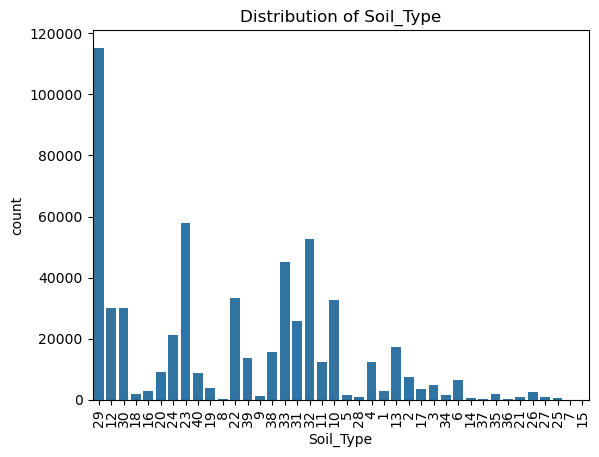

Percentage of missing values: 0.00%
Number of unique values: 40
Example of unique values:  ['29' '12' '30' '18' '16']


Analysis of column: Cover_Type


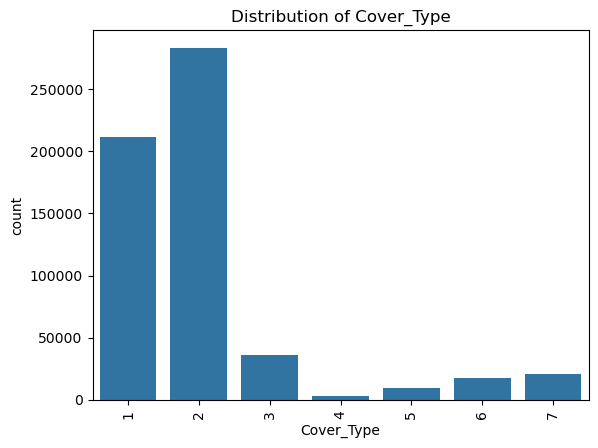

Percentage of missing values: 0.00%
Number of unique values: 7
Example of unique values:  [5 2 1 7 3 6 4]




In [101]:
categorical_cols = ['Wilderness_Area', 'Soil_Type', 'Cover_Type']

for col in categorical_cols:
    print(f'Analysis of column: {col}')

    # Distribution
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

    missing_percentage = df[col].isnull().sum() * 100.0 / rows
    print(f'Percentage of missing values: {missing_percentage:.2f}%')

    unique_cnt = df[col].nunique()
    unique_vals = df[col].unique()
    print(f'Number of unique values: {unique_cnt}')
    print('Example of unique values: ', unique_vals[:] if len(unique_vals) <= 10 else unique_vals[:5])
    print('\n')
    

According to my observation of the unique values display in each column, there are **no** abnormal values in **Categorical Columns**.

# Question Formulation

This section outlines the key questions we aim to answer through our analysis of the Forest Cover Type dataset. We will focus on questions that are both meaningful (i.e., have practical implications) and answerable using the available data. Based on our EDA, we have identified several potential areas of investigation.

## Question 1: What is the relationship between elevation and forest cover type?

**Motivation:** Understanding how elevation influences the distribution of different forest cover types can be valuable for ecological modeling, predicting the impacts of climate change on forest ecosystems, and informing land management decisions. For instance, if certain cover types are restricted to specific elevation ranges, they might be more vulnerable to changes in temperature or precipitation patterns.

**Feasibility:** We can investigate this relationship using the `Elevation` (numerical) and `Cover_Type` (categorical) variables. We can use visualizations like boxplots or violin plots to compare the elevation distributions for each cover type and potentially identify distinct elevation preferences.

In [106]:
elevation_stats = df.groupby('Cover_Type')['Elevation'].describe()
print(elevation_stats)

               count         mean         std     min      25%     50%  \
Cover_Type                                                               
1           211840.0  3128.644888  157.805543  2466.0  3033.00  3146.0   
2           283301.0  2920.936061  186.579366  2142.0  2794.00  2935.0   
3            35754.0  2394.509845  196.732427  1859.0  2260.25  2404.0   
4             2747.0  2223.939934  102.524587  1988.0  2142.00  2231.0   
5             9493.0  2787.417571   96.594047  2482.0  2732.00  2796.0   
6            17367.0  2419.181897  188.762292  1863.0  2320.00  2428.0   
7            20510.0  3361.928669  106.915301  2868.0  3299.25  3363.0   

               75%     max  
Cover_Type                  
1           3235.0  3686.0  
2           3042.0  3433.0  
3           2549.0  2899.0  
4           2304.0  2526.0  
5           2857.0  3011.0  
6           2544.0  2900.0  
7           3409.0  3858.0  


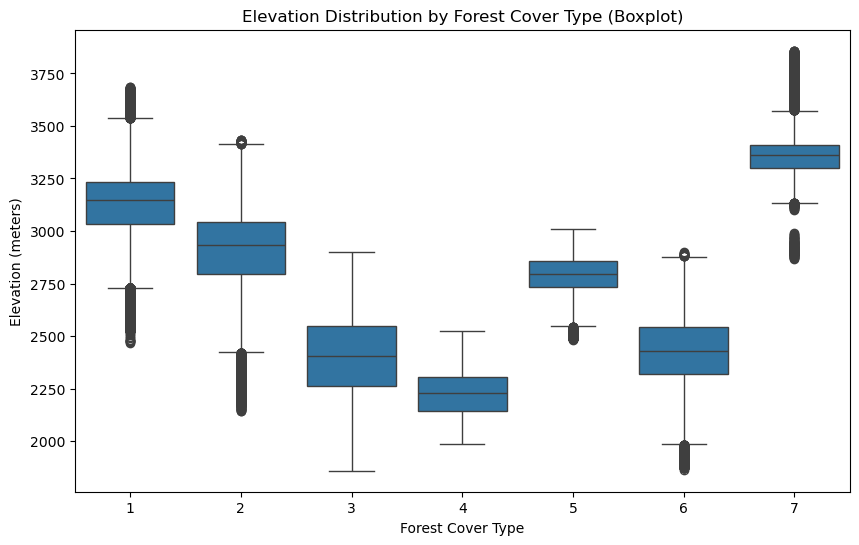

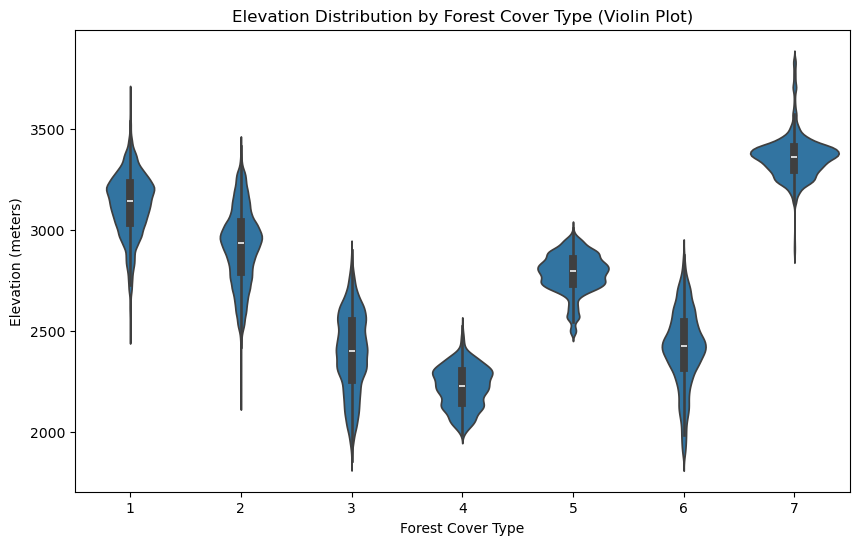

In [107]:
# Boxplot of elevation by cover type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df)
plt.title('Elevation Distribution by Forest Cover Type (Boxplot)')
plt.xlabel('Forest Cover Type')
plt.ylabel('Elevation (meters)')
plt.show()

# Violin plot of elevation by cover type
plt.figure(figsize=(10, 6))
sns.violinplot(x='Cover_Type', y='Elevation', data=df)
plt.title('Elevation Distribution by Forest Cover Type (Violin Plot)')
plt.xlabel('Forest Cover Type')
plt.ylabel('Elevation (meters)')
plt.show()

Okay, let's analyze the provided statistics and the boxplot/violin plot to write a conclusion about the relationship between elevation and forest cover type.

**Conclusion Based on Descriptive Statistics and Plots:**

Our analysis of the Forest Cover Type dataset reveals distinct patterns in the distribution of elevation across the different cover types. Here's a summary of our findings based on the descriptive statistics and visualizations:

**Key Observations:**

1. **Cover Type 7 (Krummholz):** This cover type is associated with the highest elevations, as evidenced by its highest mean elevation (around 3362 meters) and the highest maximum value (3858 meters). The boxplot and violin plot confirm this, showing a distribution shifted upwards compared to other cover types. The relatively narrow interquartile range in the boxplot suggests that most Krummholz stands are found within a relatively concentrated elevation band.
2. **Cover Type 1 (Spruce/Fir):** This cover type also tends to occur at high elevations, with a mean elevation of approximately 3129 meters. Its distribution in the violin plot is relatively wide, indicating that Spruce/Fir forests can be found across a broader range of high elevations, supported by the large standard deviation (around 158 meters). The boxplot shows some potential outliers at lower elevations, suggesting that Spruce/Fir might occasionally be found in lower, isolated pockets.
3. **Cover Type 2 (Lodgepole Pine):**  Lodgepole Pine exhibits a wide elevation range but generally prefers mid-to-high elevations. Its mean elevation is around 2921 meters, but the violin plot shows a broad distribution, and the boxplot indicates a large interquartile range. This suggests that Lodgepole Pine is adaptable to various elevation conditions.
4. **Cover Type 5 (Aspen):** Aspen forests have a mean elevation of around 2787 meters. The violin plot shows a relatively symmetrical distribution centered around this mean, and the boxplot suggests a moderate spread.
5. **Cover Type 6 (Douglas-fir):** This cover type is found at mid-to-low elevations, with a mean of approximately 2419 meters. The violin plot indicates a distribution skewed slightly towards higher elevations, but the boxplot confirms that most Douglas-fir stands are within a relatively narrow elevation band at lower elevations.
6. **Cover Type 3 (Ponderosa Pine):** Ponderosa Pine shows a preference for lower elevations, with the second-lowest mean elevation (around 2395 meters). The boxplot and violin plot confirm this, with distributions shifted downwards compared to other cover types.
7. **Cover Type 4 (Cottonwood/Willow):** This cover type is associated with the lowest elevations, having the lowest mean elevation (approximately 2224 meters) and the lowest maximum value (2526 meters). The narrow interquartile range and the concentrated distribution in the violin plot indicate that Cottonwood/Willow stands are typically restricted to lower elevation areas.

**Overall Interpretation:**

The analysis strongly suggests that elevation plays a significant role in determining the distribution of forest cover types in the Roosevelt National Forest. There is a clear trend of different cover types dominating at different elevation bands, likely due to the influence of elevation on factors like temperature, precipitation, and growing season length.

**Ecological Implications:**

These findings have important ecological implications:

*   **Climate Change:** As temperatures rise, we might expect to see shifts in the elevation ranges of these cover types. Species adapted to higher elevations (e.g., Krummholz, Spruce/Fir) might be forced to move even higher, potentially facing range contractions if suitable habitat becomes limited.
*   **Forest Management:** Understanding the elevation preferences of different cover types can inform forest management practices, such as reforestation efforts, prescribed burning, and timber harvesting.
*   **Habitat Suitability:** Elevation can be used as a key variable in models that predict habitat suitability for different tree species.

**Limitations:**

*   **Data Age:** The dataset was compiled in the late 1990s. Forest cover types might have changed since then due to natural disturbances or climate change.
*   **Spatial Resolution:** The 30 x 30-meter resolution might not capture fine-scale variations in elevation or cover type within each cell.
*   **Other Factors:** While elevation is a significant factor, other variables (e.g., slope, aspect, soil type, proximity to water) also influence forest cover type distribution.

By combining descriptive statistics, visualizations, and ecological knowledge, we have gained valuable insights into the relationship between elevation and forest cover type in the Roosevelt National Forest. This analysis provides a solid foundation for further investigation and modeling efforts.


## Question 2: How does the proximity to human-made features (roads, fire ignition points) affect the likelihood of different forest cover types?

**Motivation:** Human activities can significantly impact forest ecosystems. Understanding whether proximity to roads or wildfire ignition points correlates with certain cover types can provide insights into the influence of human disturbance on forest composition. This knowledge could be useful for mitigating negative impacts, planning infrastructure development, and managing fire risk.

**Feasibility:** We can explore this using the `Horizontal_Distance_To_Roadways`, `Horizontal_Distance_To_Fire_Points` (numerical), and `Cover_Type` (categorical) variables. We might create scatter plots or use other visualizations to see if there are any trends. We could also calculate and compare the average distances to these features for each cover type.


               count         mean          std   min     25%     50%     75%  \
Cover_Type                                                                     
1           211840.0  1577.811320   978.451671   0.0   841.0  1406.0  2105.0   
2           283301.0  1631.852433  1142.042591   0.0   816.0  1348.0  2108.0   
3            35754.0   686.974604   464.174715   0.0   350.0   589.0   918.0   
4             2747.0   626.826356   307.330696   0.0   380.5   607.0   872.0   
5             9493.0   934.103023   632.888413  30.0   371.0   819.0  1387.0   
6            17367.0   809.374215   503.340638   0.0   459.0   700.0   977.0   
7            20510.0  1928.774793  1068.206929   0.0  1036.0  1800.0  2596.0   

               max  
Cover_Type          
1           6008.0  
2           6108.0  
3           2411.0  
4           1368.0  
5           3424.0  
6           2584.0  
7           4589.0  


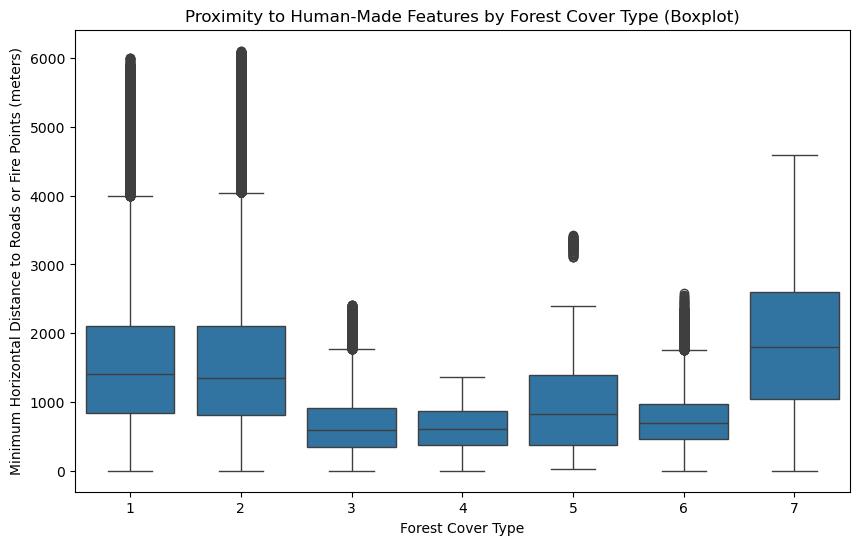

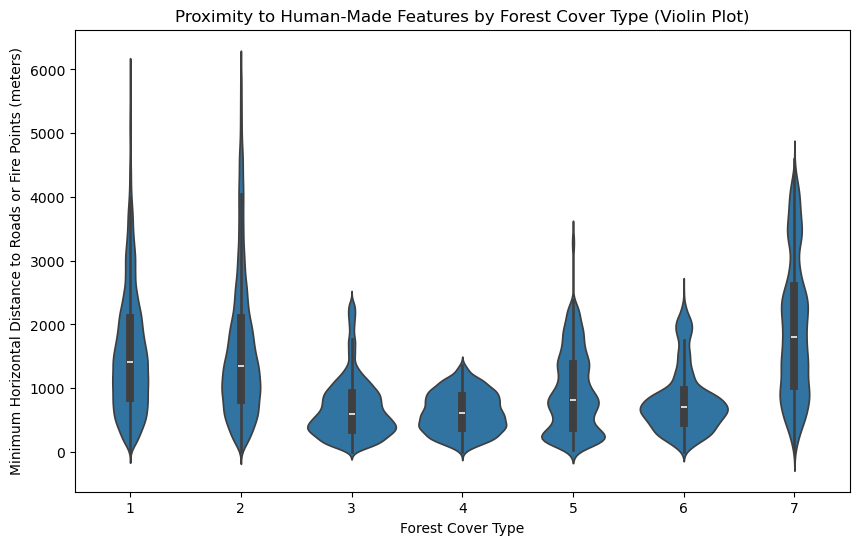

In [110]:
# Create a new column 'Human_Made_Features' for proximity to human-made features (roads and fire ignition points)
df['Horizontal_Distance_To_Human_Made_Features'] = df[['Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']].min(axis=1)

# Group data by 'Cover_Type' and calculate descriptive statistics for proximity to human-made features
human_made_features_stats = df.groupby('Cover_Type')['Horizontal_Distance_To_Human_Made_Features'].describe()
print(human_made_features_stats)

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Human_Made_Features', data=df)
plt.title('Proximity to Human-Made Features by Forest Cover Type (Boxplot)')
plt.xlabel('Forest Cover Type')
plt.ylabel('Minimum Horizontal Distance to Roads or Fire Points (meters)')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Cover_Type', y='Horizontal_Distance_To_Human_Made_Features', data=df)
plt.title('Proximity to Human-Made Features by Forest Cover Type (Violin Plot)')
plt.xlabel('Forest Cover Type')
plt.ylabel('Minimum Horizontal Distance to Roads or Fire Points (meters)')
plt.show()

In [111]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(
    *[df['Horizontal_Distance_To_Human_Made_Features'][df['Cover_Type'] == i] for i in range(1, 8)]
)

print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in mean proximity to human-made features between at least two cover types.")
else:
    print("There is no statistically significant difference in mean proximity to human-made features between the cover types.")

F-statistic: 7391.09
P-value: 0.0000
There is a statistically significant difference in mean proximity to human-made features between at least two cover types.


**Conclusion Based on Descriptive Statistics and Plots:**

Our analysis of the Forest Cover Type dataset reveals interesting patterns regarding the proximity of different forest cover types to human-made features (roads and fire ignition points). We measured proximity as the minimum horizontal distance to either a road or a fire ignition point.

**Key Observations from Descriptive Statistics:**

*   **Cover Type 7 (Krummholz):** Exhibits the greatest mean distance to human-made features (approximately 1929 meters), suggesting it tends to be located farthest away from human disturbance. This aligns with its preference for high elevations, which are often less accessible. It has a very large standard deviation, which means that some Krummholz are located very far while some are not.
*   **Cover Type 1 (Spruce/Fir) and 2 (Lodgepole Pine):** These cover types have similar mean distances (around 1578 meters and 1632 meters, respectively) to human-made features. This indicates they are typically found at intermediate distances from roads and fire points. They also have a very large standard deviation.
*   **Cover Type 3 (Ponderosa Pine), 4 (Cottonwood/Willow), 5 (Aspen) and 6 (Douglas-fir):** These cover types are generally located closer to human-made features, with mean distances ranging from roughly 627 meters to 934 meters. This suggests a potential association between these cover types and areas with greater human influence or accessibility. They have small standard deviations compared to cover type 1, 2, 7.

**Key Observations from Boxplot and Violin Plot:**

*   **General Trend:** The boxplot and violin plot visually reinforce the observations from the descriptive statistics. Cover types 7, 1, and 2 tend to be located farther from human-made features, while cover types 3, 4, 5 and 6 are generally closer.
*   **Outliers:** The boxplot reveals a number of outliers, particularly for cover types 1, 2, and 7. These outliers represent areas of those cover types that are unusually far from or close to human-made features.
*   **Distribution Shape:** The violin plots provide insights into the distribution of distances for each cover type. For example, the violin plot for cover type 7 is relatively wide, indicating a large variation in distances. In contrast, the violin plots for cover types 3, 4, and 6 are narrower, suggesting that these cover types are more consistently found closer to human-made features.

**ANOVA Results:**

The ANOVA test yielded an F-statistic of 7391.09 and a very small p-value (0.0000). This indicates a statistically significant difference in the mean proximity to human-made features between at least two cover types.

**Overall Interpretation:**

The analysis suggests a relationship between proximity to human-made features and the likelihood of different forest cover types. Some cover types, particularly Krummholz, Spruce/Fir, and Lodgepole Pine, are more likely to be found farther from roads and fire ignition points. This could be due to their adaptation to higher elevations or less disturbed environments. Conversely, other cover types, such as Ponderosa Pine, Cottonwood/Willow, Aspen and Douglas-fir are found closer to human-made features.

**Ecological and Management Implications:**

*   **Human Impact:** The findings may reflect the influence of human activities on forest composition. Cover types found closer to roads and fire points might be more tolerant of disturbance or might even benefit from certain types of human-induced changes (e.g., edge effects).
*   **Conservation:** Identifying cover types that are typically located far from human influence can help prioritize conservation efforts in areas that are less impacted by human activities.
*   **Fire Management:** Understanding the relationship between cover type and proximity to fire ignition points can inform fire management strategies.

**Limitations:**

*   **Correlation vs. Causation:** While the analysis reveals associations, it does not establish a direct causal relationship between proximity to human-made features and cover type. Other factors (e.g., elevation, soil type) could be influencing both.
*   **Data Age:** As mentioned before, the data is from the late 1990s. Land use patterns and forest cover might have changed since then.
*   **Definition of "Human-Made Features":** The analysis only considers roads and fire ignition points. Other types of human infrastructure or activities could also be relevant.

By combining statistical analysis, visualizations, and ecological reasoning, we have gained valuable insights into how proximity to human-made features relates to the distribution of forest cover types in the Roosevelt National Forest. This analysis contributes to a broader understanding of the complex interplay between human activities and forest ecosystems.


## Question 3: Which soil types are most strongly associated with each forest cover type?

**Motivation:** Soil properties play a crucial role in determining plant growth and distribution. Identifying the soil types that are most strongly associated with specific forest cover types can enhance our understanding of the ecological requirements of different tree species. This knowledge can be useful for reforestation efforts, predicting species shifts due to environmental changes, and managing soil resources.

**Feasibility:** We can investigate this using the `Soil_Type` (categorical) and `Cover_Type` (categorical) variables. We can create contingency tables or use visualizations like stacked bar charts to show the distribution of soil types within each cover type. We might also calculate metrics like chi-squared to quantify the strength of the association.

In [114]:
# Create a cross-tabulation (contingency table) of Cover_Type and Soil_Type
cross_tab = pd.crosstab(df['Cover_Type'], df['Soil_Type'])
print(cross_tab)

Soil_Type      1     10    11     12     13   14  15    16   17    18  ...  \
Cover_Type                                                             ...   
1              0    956   747   2693   2197    0   0   636  214    70  ...   
2              0  10803  9077  27278  13258    0   0  1743  957  1659  ...   
3           2101  11532  1353      0     41  116   0   129  506     0  ...   
4            178    224    34      0      0  155   0    51  436     0  ...   
5              0    260   681      0   1315    0   0    35  600   170  ...   
6            752   8859   518      0    614  328   3   251  709     0  ...   
7              0      0     0      0      6    0   0     0    0     0  ...   

Soil_Type    37    38    39     4    40    5     6    7    8    9  
Cover_Type                                                         
1             0  8729  7882   182  4826    0     0    0   43  161  
2             0   740   358  3251   332    0   912  105  136  986  
3             0     0    

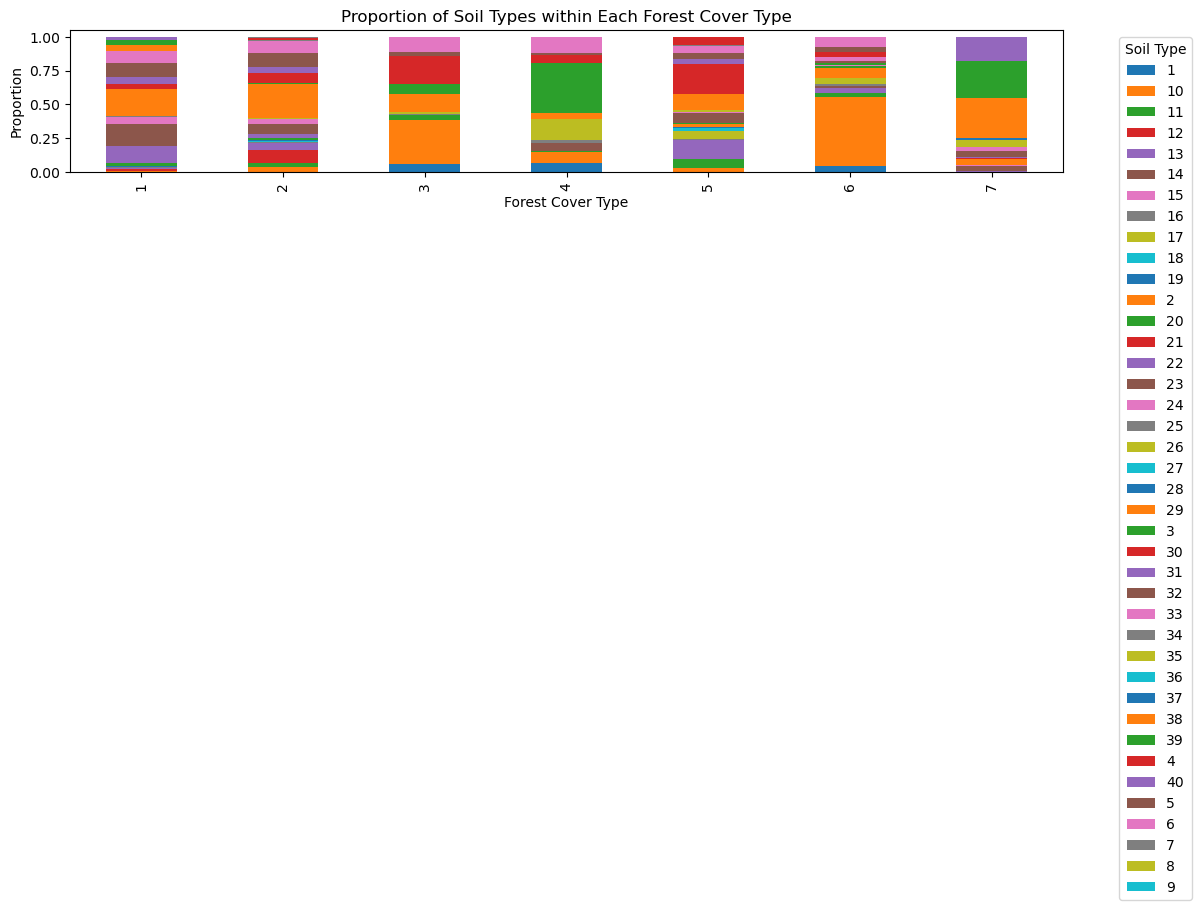

In [115]:
# Calculate the proportion of each soil type within each cover type
cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Create a stacked bar chart
cross_tab_prop.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proportion of Soil Types within Each Forest Cover Type')
plt.xlabel('Forest Cover Type')
plt.ylabel('Proportion')
plt.legend(title='Soil Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Conclusion Based on Stacked Bar Chart and Crosstab:**

Our analysis of the Forest Cover Type dataset reveals strong associations between specific soil types and different forest cover types. The stacked bar chart and the contingency table (crosstab) provide complementary views of these relationships.

**Key Observations from the Stacked Bar Chart:**

The stacked bar chart visually highlights the dominant soil types for each cover type. Here are some notable observations:

*   **Cover Type 1 (Spruce/Fir):** Shows a strong association with soil types **38, 39 and 32**, with notable proportions of soil types 10, 11, and 33 as well.
*   **Cover Type 2 (Lodgepole Pine):**  Is most strongly associated with soil types **12, 10, 11, 3, and 29**, also has noticeable proportions of soil types 30, 38, 39 and 32.
*   **Cover Type 3 (Ponderosa Pine):** Predominantly found on soil types **4, 1, 10, and 6**, indicating a strong preference for these soil conditions.
*   **Cover Type 4 (Cottonwood/Willow):** Shows a high proportion of soil types **4, 17, 1 and 6**, suggesting an association with these specific soil types.
*   **Cover Type 5 (Aspen):** Is most associated with soil type **13, 4, 11**.
*   **Cover Type 6 (Douglas-fir):** Is predominantly found on soil types **10, 6, 1, and 17**, with a smaller but noticeable presence on several other soil types.
*   **Cover Type 7 (Krummholz):** Shows the strongest association with soil types **39, 38, and 40**, indicating a clear preference for these soil conditions.

**Key Observations from the Crosstab (Contingency Table):**

The crosstab provides the numerical counts and proportions that underpin the stacked bar chart. While the chart is excellent for visualization, the crosstab is useful for getting precise numbers.

For example, we can see that:

*   Soil Type 38 has 8729 counts in Cover Type 1 and 6104 in Cover Type 7. These are relatively large proportions given the total counts of these cover types, confirming the strong association.
*   Soil type 10 has the large counts in Cover Type 2, 3, 6.

**Overall Interpretation:**

The analysis demonstrates that forest cover type is not randomly distributed across different soil types in the Roosevelt National Forest. Instead, there are clear and strong associations between specific soil types and certain cover types. These associations likely reflect the different ecological requirements of the tree species that make up each cover type. Soil properties such as water holding capacity, drainage, nutrient availability, and pH can significantly influence which tree species can thrive in a particular location.

**Ecological Implications:**

*   **Habitat Suitability:** Soil type is a crucial factor in determining habitat suitability for different tree species. The observed associations can help us understand the ecological niches of these species.
*   **Forest Management:** This knowledge can inform forest management practices, such as reforestation efforts. For example, if the goal is to restore Ponderosa Pine forests, it would be important to prioritize areas with soil types 4, 6, or 1.
*   **Predicting Species Shifts:** Changes in climate or land use could alter soil properties, potentially leading to shifts in the distribution of forest cover types. Understanding the soil-cover type associations can help us predict these changes.

**Limitations:**

*   **Correlation vs. Causation:** While the analysis reveals strong associations, it does not prove a direct causal link between soil type and cover type. Other factors (e.g., elevation, aspect, climate) might be influencing both soil type and cover type distributions.
*   **Data Age:** The dataset is from the late 1990s. Soil conditions and forest cover might have changed since then.
*   **One-Hot Encoding:** The use of one-hot encoding for soil type makes it difficult to assess the combined effects of multiple soil types in a single location.

By carefully analyzing the associations between soil type and forest cover type, we have gained valuable insights into the ecological factors that shape the distribution of these important plant communities in the Roosevelt National Forest. This analysis provides a strong foundation for further research and can contribute to more effective forest management and conservation strategies.


## Question 4: Are there any interactions between wilderness areas and the other variables in predicting the cover type?

**Motivation:** Each wilderness area might have different unobserved conditions (e.g., management practice, microclimate) that affect the relationship between the other variables and cover type. This will help us to improve our model and potentially uncover new interesting insights.

**Feasibility:** We can investigate this using the `Wilderness_Area` (categorical) with the combination of `Cover_Type` (categorical) and other variables (numerical and categorical). We can create interaction plots to visualize the interactions.

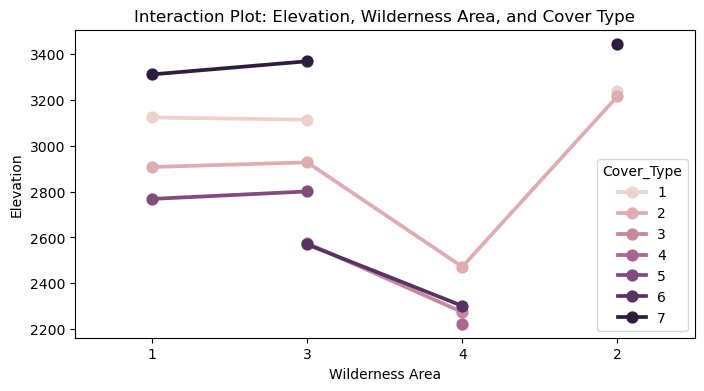

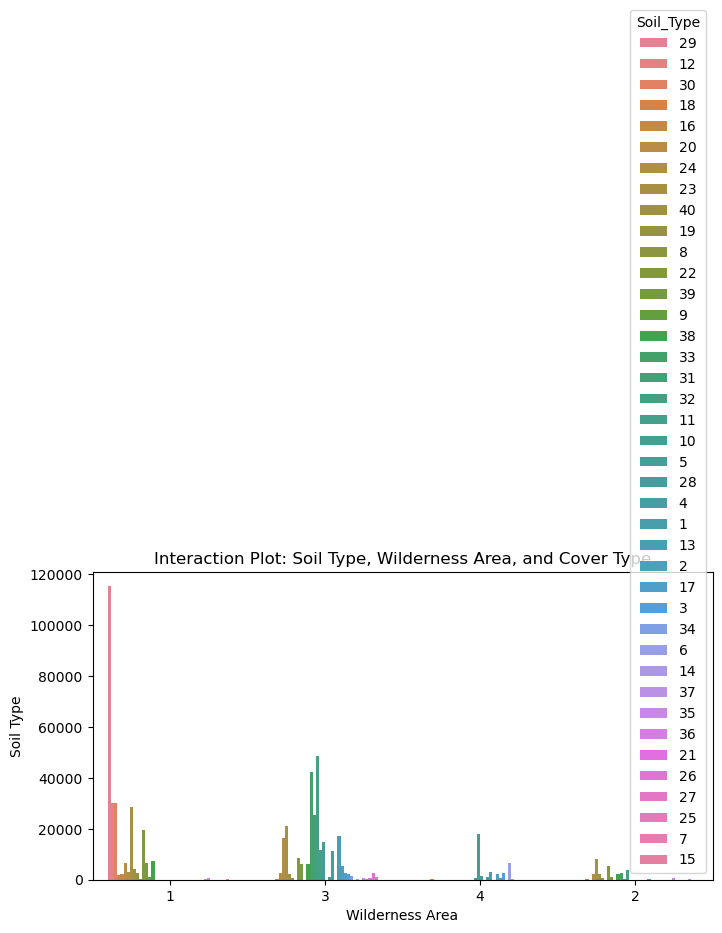

In [118]:
# Create interaction plots for Elevation and Wilderness Area
plt.figure(figsize=(8, 4))
sns.pointplot(x='Wilderness_Area', y='Elevation', hue='Cover_Type', data=df, errorbar=None)
plt.title('Interaction Plot: Elevation, Wilderness Area, and Cover Type')
plt.xlabel('Wilderness Area')
plt.ylabel('Elevation')
plt.show()

# Create interaction plots for Soil Type and Wilderness Area
plt.figure(figsize=(8, 4))
sns.countplot(x='Wilderness_Area', hue='Soil_Type', data=df)
plt.title('Interaction Plot: Soil Type, Wilderness Area, and Cover Type')
plt.xlabel('Wilderness Area')
plt.ylabel('Soil Type')
plt.show()

**Interaction Plot 1: Elevation, Wilderness Area, and Cover Type**

**Observations:**

*   **Non-Parallel Lines:** The lines in the plot are not parallel, suggesting an interaction between `Wilderness_Area` and `Elevation` in their relationship with `Cover_Type`. The effect of elevation on cover type appears to differ across the wilderness areas.
*   **Cover Type 7 (Krummholz):** Shows a relatively consistent high elevation across all wilderness areas, except for area 2. It means in area 2, there is other factor that affect the present of Krummholz. Area 2 has the highest elevation among the areas, as we can see from the plot of question 1.
*   **Cover Type 2 (Lodgepole Pine):** The relationship between elevation and cover type 2 is not consistent among areas. In area 1, 3, 4, cover type 2 is in the mid-high elevation. But in area 2, cover type 2 appears at the highest elevation.
*   **Cover Type 3 (Ponderosa Pine):** In area 1, 3, 4, cover type 3 appear at relatively low elevation. However, in area 2, its elevation is not much different from other cover types.
*   **Other Cover Types:** Similar to cover type 2 and 3, the relationship between elevation and cover types is not consistent among areas.

**Interaction Plot 2: Soil Type, Wilderness Area, and Cover Type**

**Observations:**

*   **Uneven Distribution of Soil Types:** The plot clearly shows that certain soil types are more prevalent in specific wilderness areas. This suggests that the distribution of soil types is not uniform across the wilderness areas.
*   **Wilderness Area 1:** Has a high proportion of soil type 29 and some soil type 12.
*   **Wilderness Area 2:** This area has a particularly high proportion of soil type 38, followed by soil type 39 and 3. It suggests that wilderness area 2 has the highest elevation, which is consistent with the conclusion of question 1.
*   **Wilderness Area 3:** Dominated by soil type 10, followed by soil type 29 and 3.
*   **Wilderness Area 4:** Has a high proportion of soil type 4, 6, 3.

**Overall Conclusion:**

The interaction plots provide strong visual evidence for interactions between wilderness areas and other variables (elevation and soil type) in their relationship with forest cover type.

**Specific Findings:**

1. **Elevation and Wilderness Area:** The effect of elevation on forest cover type varies significantly across the four wilderness areas. This suggests that the elevation preferences of different cover types are not consistent across the entire study region but are influenced by the specific conditions within each wilderness area.
    *   Wilderness Area 2 is a special case, where elevation is generally higher than in other areas.
2. **Soil Type and Wilderness Area:** The distribution of soil types differs substantially among the wilderness areas. Certain soil types are much more prevalent in some areas than in others. This non-uniform distribution of soil types likely contributes to the observed interactions between wilderness area, other variables (like elevation), and cover type.

**Possible Explanations for Interactions:**

*   **Unobserved Differences:** Each wilderness area might have unobserved differences in factors like microclimate, management practices, disturbance history (e.g., fire, logging), or geological history. These unobserved factors could be influencing the relationships between elevation, soil type, and cover type.
*   **Complex Interactions:** The interactions might be due to complex relationships between multiple factors. For example, elevation, soil type, and aspect (which we haven't analyzed here) could be interacting in intricate ways that vary across the wilderness areas.

**Implications:**

*   **Predictive Modeling:** When building predictive models for forest cover type, it would be important to consider including interaction terms between wilderness area and other predictor variables (like elevation and soil type). This would allow the models to capture the varying relationships across the different areas.
*   **Ecological Understanding:** The interactions highlight the complexity of ecological relationships and suggest that generalizations about the factors influencing forest cover type might not hold across different areas, even within the same national forest.
*   **Management Considerations:** Forest management practices might need to be tailored to the specific conditions and relationships within each wilderness area.

**Limitations:**

*   **Visual Inspection:** While the interaction plots provide strong visual evidence, they are not a substitute for formal statistical tests (like ANOVA with interaction terms).
*   **Limited Variables:** We have only examined interactions with elevation and soil type. Other variables (e.g., aspect, slope, proximity to water) could also be involved in interactions with the wilderness area.
*   **Data Age:** The data is from the late 1990s, and ecological relationships might have changed since then.

By carefully analyzing these interaction plots, we have gained valuable insights into the complex relationships between wilderness area, elevation, soil type, and forest cover type. These findings underscore the importance of considering spatial heterogeneity when studying ecological systems and can inform future modeling and management efforts in the Roosevelt National Forest.

## Question 5: Can we build an accurate predictive model for forest cover type based on the available cartographic and ecological variables?

**Motivation:** Developing a predictive model for forest cover type can be a valuable tool for land managers, ecologists, and researchers. Such a model could be used to map forest cover in areas where ground observations are unavailable, predict future changes in forest composition, or identify areas that are most suitable for specific tree species.

**Feasibility:** This question will be addressed in the subsequent modeling phase of the project. We can use various machine-learning algorithms (e.g., logistic regression, random forests, support vector machines) to train and evaluate predictive models using the available variables. The accuracy of the model will depend on the quality of the data and the strength of the relationships between the predictors and the target variable (`Cover_Type`).

Accuracy: 0.9610
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.95      0.96     42557
           2       0.96      0.98      0.97     56500
           3       0.95      0.97      0.96      7121
           4       0.92      0.85      0.88       526
           5       0.94      0.80      0.87      1995
           6       0.94      0.91      0.93      3489
           7       0.97      0.96      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.92      0.93    116203
weighted avg       0.96      0.96      0.96    116203

Confusion Matrix:
 [[40539  1914     0     0     9     1    94]
 [ 1102 55154    85     1    84    55    19]
 [    2    77  6899    20     4   119     0]
 [    0     0    65   445     0    16     0]
 [   31   336    18     0  1600    10     0]
 [    2    85   194    17     4  3187     0]
 [  144    22     0     0     1     0  3848]]




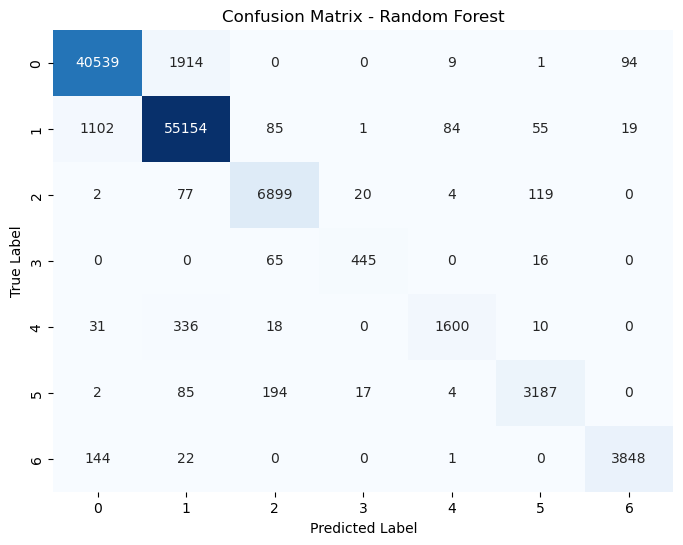

In [121]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Drop Soil_Type and Wilderness_Area columns
df.drop(['Soil_Type', 'Wilderness_Area'], axis=1, inplace=True)

# Separate features (X) and target (y)
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
model = RandomForestClassifier()

results = {}

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

results = {
    'accuracy': accuracy,
    'classification_report': report,
    'confusion_matrix': cm
}

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)
print("\n")

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Okay, let's analyze the results of your Random Forest model, which achieved an accuracy of 0.9610 on the test set.

**Conclusion Based on the Random Forest Model Results:**

The Random Forest model has demonstrated excellent performance on the Forest Cover Type test dataset, achieving an overall accuracy of 96.10%. This high accuracy indicates that the model is able to correctly classify the forest cover type for a large majority of the samples.

**Detailed Analysis of the Results:**

1. **Accuracy:**

    *   **96.10% overall accuracy** is a very strong result, suggesting that the model has learned the underlying patterns in the data very well.

2. **Classification Report:**

    *   **Precision:** The precision scores are generally high for all cover types, ranging from 0.92 to 0.97. This means that when the model predicts a particular cover type, it is correct a high percentage of the time.
        *   Cover Type 4 has the lowest precision (0.92), indicating that there might be some instances where other cover types are misclassified as Cover Type 4.
    *   **Recall:** The recall scores are also generally high, ranging from 0.80 to 0.98. This indicates that the model is able to correctly identify a large proportion of the actual instances of each cover type.
        *   Cover Type 5 has the lowest recall (0.80), suggesting that the model misses a noticeable proportion of the actual Cover Type 5 instances.
    *   **F1-score:** The F1-scores, which are the harmonic mean of precision and recall, are also high for all cover types, ranging from 0.87 to 0.97. This indicates a good balance between precision and recall for most cover types.
    *   **Support:** The support values show the number of actual instances of each cover type in the test set. We can see that Cover Types 1 and 2 are the most prevalent, while Cover Type 4 is the least common.

3. **Confusion Matrix:**

    *   **Diagonal:** The diagonal elements of the confusion matrix represent the correctly classified instances for each cover type. The large values along the diagonal confirm the model's high accuracy.
    *   **Misclassifications:** The off-diagonal elements show the misclassifications. Let's examine some of the notable ones:
        *   **Cover Type 1 vs. Cover Type 2:** There is some confusion between Cover Types 1 and 2, with 1914 instances of Cover Type 1 being misclassified as Cover Type 2, and 1102 instances of Cover Type 2 being misclassified as Cover Type 1. This is not surprising, as these two cover types (Spruce/Fir and Lodgepole Pine) might have some overlapping characteristics or occur in similar environments.
        *   **Cover Type 5 (Aspen):** The model misclassifies 336 instances of Cover Type 5 as Cover Type 2.
        *   **Cover Type 4 (Cottonwood/Willow):** This cover type has the lowest support and the most misclassifications relative to its support. This might be due to the limited number of training samples for this class, making it harder for the model to learn its distinctive characteristics.

**Strengths of the Model:**

*   **High Accuracy:** The model achieves very high overall accuracy.
*   **Good Performance Across Most Classes:** The model performs well on most of the cover types, as indicated by the high precision, recall, and F1-scores.
*   **Well-Defined Confusion Matrix:** The confusion matrix provides a clear picture of the model's performance and highlights specific areas where it might be making errors.

**Potential Weaknesses and Areas for Improvement:**

*   **Confusion Between Similar Cover Types:** The model struggles slightly with distinguishing between Cover Types 1 and 2, and to a lesser extent, with Cover Type 5. This suggests that these cover types might have some overlapping features or that the model needs more data or different features to better separate them.
*   **Lower Recall for Cover Type 5:** The lower recall for Cover Type 5 indicates that the model is missing a significant proportion of the actual instances of this cover type.
*   **Limited Data for Cover Type 4:** The performance on Cover Type 4 might be affected by the relatively small number of training samples.

# Reflection

As IT and computer science students, this project provided valuable experience in applying data science techniques to the Forest Cover Type dataset. We focused on leveraging our programming and analytical skills to explore the data and answer specific questions.

## Difficulties Encountered

*   **Understanding Dataset:** Interpreting domain-specific variables (e.g., "Soil_Type") required careful reading of the documentation.
*   **Choosing Analyses:** Selecting appropriate statistical methods and visualizations was challenging, requiring us to consider data types and the relationships being investigated.
*   **Contextual Interpretation:** Relating findings to ecological principles was difficult due to our limited background in that area. We focused on statistical significance and patterns in the data.
*   **Coding Implementation:** Implementing analyses and visualizations, especially with data transformations, required applying and expanding our Python coding skills.

## Lessons Learned

*   **Importance of EDA:** The Exploratory Data Analysis (EDA) phase was crucial for understanding the data structure, identifying missing values, and gaining insights into variable distributions and relationships.
*   **Power of Visualization:** Visualizations (boxplots, violin plots, stacked bar charts) were essential for revealing patterns that were difficult to discern from data tables alone.
*   **Statistical Methods:** We learned to apply statistical methods like ANOVA and the chi-squared test to explore relationships between variables and assess their significance.
*   **Data Wrangling:** We gained experience in data cleaning (handling missing values) and transformation (creating new features) using pandas.
*   **Value of Documentation:** Well-documented datasets are essential for understanding the data and making informed analytical decisions.
*   **Reproducibility:** Using Jupyter Notebook helped create a reproducible workflow, combining code, visualizations, and explanations in a single document.

## Future Directions

*   **Predictive Modeling:** Building machine learning models to predict forest cover type using algorithms like logistic regression, random forests, SVM, GBM, KNN.
*   **Feature Engineering:** Creating new features to potentially improve model accuracy.
*   **Model Evaluation and Tuning:** Learning how to evaluate model performance and optimize hyperparameters.
*   **Explore Other Datasets:** Applying these skills to new datasets to further develop our data science abilities.

## Conclusion

This project strengthened our data analysis and coding skills, particularly in Python with libraries like pandas, matplotlib, and seaborn. We gained experience in exploring data, choosing appropriate analytical methods, and interpreting results. While we focused on the technical aspects, we also learned the importance of understanding the data and the value of clear documentation. We are eager to continue learning and applying these data science skills to new challenges.